### Capstone project.
### Determinar si una reservacion de hotel sera cancelada basada en carateristicas del pais de procedencia del cliente y datos del cliente.

### Datasets locations: 
### https://www.kaggle.com/jessemostipak/hotel-booking-demand
### https://www.kaggle.com/unsdsn/world-happiness

### Giovanna Francesa Alfaro.

#### Import Libraries



In [1]:
# Load the Pandas libraries - alias 'pd' 
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

#import pycountry
#import pyspark.sql.functions as sqlf

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#cross validation
from sklearn.model_selection import train_test_split

### Uploading the dataset using Pandas


In [2]:
bookings = pd.read_csv('C:\\Users\\gfrances\\Desktop\\personal\\Big-data_Analytics\\python-big-data-5\\Capstone-Giovanna\\hotel_bookings.csv', header=0, low_memory=False, encoding='latin-1')
happiness_2015 = pd.read_csv('C:\\Users\\gfrances\\Desktop\\personal\\Big-data_Analytics\\python-big-data-5\\Capstone-Giovanna\\2015.csv', header=0, low_memory=False, encoding='latin-1')
happiness_2016 = pd.read_csv('C:\\Users\\gfrances\\Desktop\\personal\\Big-data_Analytics\\python-big-data-5\\Capstone-Giovanna\\2016.csv', header=0, low_memory=False, encoding='latin-1')
happiness_2017 = pd.read_csv('C:\\Users\\gfrances\\Desktop\\personal\\Big-data_Analytics\\python-big-data-5\\Capstone-Giovanna\\2017.csv', header=0, low_memory=False, encoding='latin-1')
paises = pd.read_csv('C:\\Users\\gfrances\\Desktop\\personal\\Big-data_Analytics\\python-big-data-5\\Capstone-Giovanna\\codigos_paises.csv', header=0, low_memory=False, encoding='latin-1')

## Exploring the datasets

In [3]:
print(bookings.head())
print(bookings.describe())
print(bookings.info())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [4]:
print(happiness_2015.head())
print(happiness_2015.describe())
print(happiness_2015.info())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [5]:
print(happiness_2016.head())
print(happiness_2016.describe())
print(happiness_2016.info())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [6]:
print(happiness_2017.head())
print(happiness_2017.describe())
print(happiness_2017.info())

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0 

In [7]:
print(paises.head())
print(paises.describe())
print(paises.info())

          Country Alpha_2code Alpha_3code  Numeric
0     Afghanistan          AF         AFG        4
1         Albania          AL         ALB        8
2         Algeria          DZ         DZA       12
3  American Samoa          AS         ASM       16
4         Andorra          AD         AND       20
          Numeric
count  249.000000
mean   433.835341
std    252.980446
min      4.000000
25%    218.000000
50%    434.000000
75%    652.000000
max    894.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
Country        249 non-null object
Alpha_2code    248 non-null object
Alpha_3code    249 non-null object
Numeric        249 non-null int64
dtypes: int64(1), object(3)
memory usage: 7.9+ KB
None


## Merging Bookings dataset with Countries data set so we can replace the Alpha 3 code in the bookings file per the Country name, this will allow us then to merge the respective happiness file using the Country as common column.

In [8]:
hotelFeatures=bookings.merge(paises, how='left', on='Alpha_3code')

In [9]:
hotelFeatures.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Alpha_2code,Numeric
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,Portugal,PT,620.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,Portugal,PT,620.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,United Kingdom,GB,826.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,United Kingdom,GB,826.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,7/3/2015,United Kingdom,GB,826.0


In [10]:
hotelFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 35 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
Alpha_3code                       118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

###  Merging resulting dataset called hotelFeatures with the happiness datasets by the common column "Country"

In [11]:
hotelFeatures=hotelFeatures.merge(happiness_2017, how='left', on='Country')

## Removing attributes that are were considered in other attributes or are not significant for the bussiness question.

In [12]:
hotelFeatures = hotelFeatures.drop(['arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_month', 'babies', 'Alpha_3code', 'market_segment', 'previous_cancellations', 'previous_cancellations', 'previous_bookings_not_canceled','reserved_room_type','assigned_room_type','agent','reservation_status', 'reservation_status_date', 'deposit_type', 'company', 'Alpha_2code', 'Numeric'], axis=1)

In [13]:
hotelFeatures.head()

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Resort Hotel,0,342,2015,0,0,2,0.0,BB,Direct,...,5.195,5.285042,5.104959,1.315175,1.367043,0.795844,0.498465,0.095103,0.015869,1.107683
1,Resort Hotel,0,737,2015,0,0,2,0.0,BB,Direct,...,5.195,5.285042,5.104959,1.315175,1.367043,0.795844,0.498465,0.095103,0.015869,1.107683
2,Resort Hotel,0,7,2015,0,1,1,0.0,BB,Direct,...,6.714,6.783792,6.644209,1.441634,1.496460,0.805336,0.508190,0.492774,0.265428,1.704144
3,Resort Hotel,0,13,2015,0,1,1,0.0,BB,Corporate,...,6.714,6.783792,6.644209,1.441634,1.496460,0.805336,0.508190,0.492774,0.265428,1.704144
4,Resort Hotel,0,14,2015,0,2,2,0.0,BB,TA/TO,...,6.714,6.783792,6.644209,1.441634,1.496460,0.805336,0.508190,0.492774,0.265428,1.704144


In [14]:
hotelFeatures = hotelFeatures.drop(['Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity','Trust..Government.Corruption.','Dystopia.Residual'], axis=1)

In [15]:
hotelFeatures.head()

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,is_repeated_guest,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Country,Happiness.Rank,Happiness.Score
0,Resort Hotel,0,342,2015,0,0,2,0.0,BB,Direct,0,3,0,Transient,0.0,0,0,Portugal,89.0,5.195
1,Resort Hotel,0,737,2015,0,0,2,0.0,BB,Direct,0,4,0,Transient,0.0,0,0,Portugal,89.0,5.195
2,Resort Hotel,0,7,2015,0,1,1,0.0,BB,Direct,0,0,0,Transient,75.0,0,0,United Kingdom,19.0,6.714
3,Resort Hotel,0,13,2015,0,1,1,0.0,BB,Corporate,0,0,0,Transient,75.0,0,0,United Kingdom,19.0,6.714
4,Resort Hotel,0,14,2015,0,2,2,0.0,BB,TA/TO,0,0,0,Transient,98.0,0,1,United Kingdom,19.0,6.714


## Correlation Matrix

In [16]:
corrMatrix = hotelFeatures.corr()
print(corrMatrix)

                             is_canceled  lead_time  arrival_date_year  \
is_canceled                     1.000000   0.293123           0.016660   
lead_time                       0.293123   1.000000           0.040142   
arrival_date_year               0.016660   0.040142           1.000000   
stays_in_weekend_nights        -0.001791   0.085671           0.021497   
stays_in_week_nights            0.024765   0.165799           0.030883   
adults                          0.060017   0.119519           0.029635   
children                        0.005048  -0.037622           0.054624   
is_repeated_guest              -0.084793  -0.124410           0.010341   
booking_changes                -0.144381   0.000149           0.030872   
days_in_waiting_list            0.054186   0.170084          -0.056497   
adr                             0.047557  -0.063077           0.197580   
required_car_parking_spaces    -0.195498  -0.116451          -0.013684   
total_of_special_requests      -0.2346

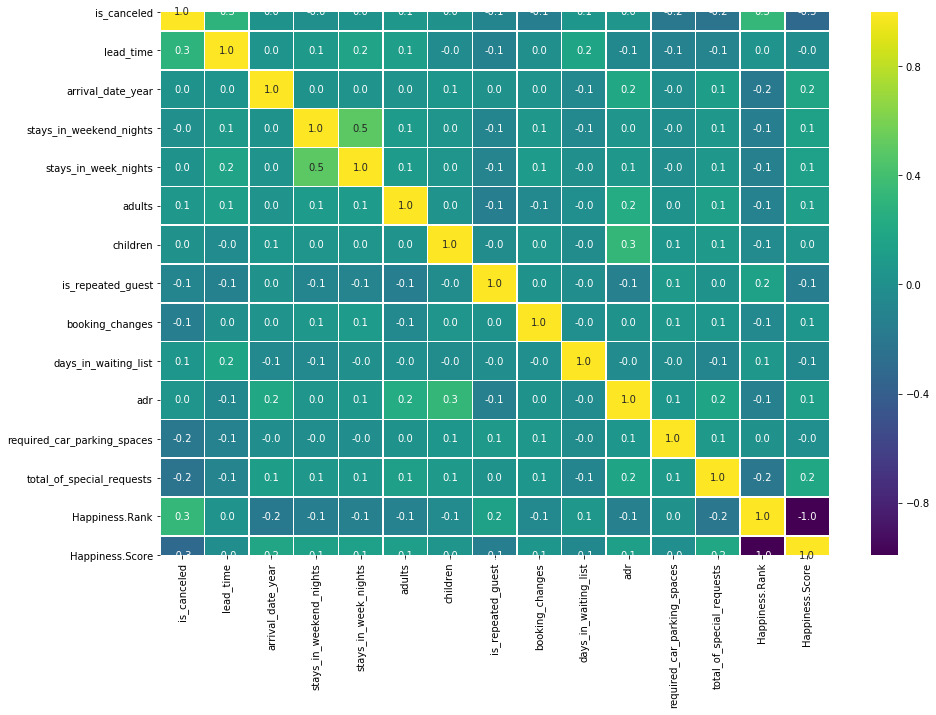

In [17]:
plt.subplots(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True, fmt=".1f", cmap='viridis', linewidths=.5,  xticklabels=True, yticklabels=True)
plt.show()

## Covariance Matrix 

In [18]:
covMat = hotelFeatures.cov()
print(covMat)

                             is_canceled     lead_time  arrival_date_year  \
is_canceled                     0.233210     15.126964           0.005692   
lead_time                      15.126964  11419.721511           3.034866   
arrival_date_year               0.005692      3.034866           0.500522   
stays_in_weekend_nights        -0.000864      9.142389           0.015188   
stays_in_week_nights            0.022822     33.810687           0.041694   
adults                          0.016789      7.398401           0.012145   
children                        0.000972     -1.602367           0.015402   
is_repeated_guest              -0.007197     -2.336794           0.001286   
booking_changes                -0.045481      0.010375           0.014247   
days_in_waiting_list            0.460407    319.796767          -0.703261   
adr                             1.160602   -340.640932           7.064052   
required_car_parking_spaces    -0.023158     -3.052469          -0.002375   

## Checking data types, converting to categorical variables in order to solve the classification problem and renaming attributes.

In [19]:
hotelFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 20 columns):
hotel                          119390 non-null object
is_canceled                    119390 non-null int64
lead_time                      119390 non-null int64
arrival_date_year              119390 non-null int64
stays_in_weekend_nights        119390 non-null int64
stays_in_week_nights           119390 non-null int64
adults                         119390 non-null int64
children                       119386 non-null float64
meal                           119390 non-null object
distribution_channel           119390 non-null object
is_repeated_guest              119390 non-null int64
booking_changes                119390 non-null int64
days_in_waiting_list           119390 non-null int64
customer_type                  119390 non-null object
adr                            119390 non-null float64
required_car_parking_spaces    119390 non-null int64
total_of_special_requests      11

In [20]:
bins = [-np.inf, 0.0, 10.0]
labels=['No','Yes']
hotelFeatures['children'] = pd.cut(hotelFeatures.children, bins=bins, labels=labels)

In [21]:
hotelFeatures.dtypes

hotel                            object
is_canceled                       int64
lead_time                         int64
arrival_date_year                 int64
stays_in_weekend_nights           int64
stays_in_week_nights              int64
adults                            int64
children                       category
meal                             object
distribution_channel             object
is_repeated_guest                 int64
booking_changes                   int64
days_in_waiting_list              int64
customer_type                    object
adr                             float64
required_car_parking_spaces       int64
total_of_special_requests         int64
Country                          object
Happiness.Rank                  float64
Happiness.Score                 float64
dtype: object

In [22]:
hotelFeatures.head()

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,is_repeated_guest,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Country,Happiness.Rank,Happiness.Score
0,Resort Hotel,0,342,2015,0,0,2,No,BB,Direct,0,3,0,Transient,0.0,0,0,Portugal,89.0,5.195
1,Resort Hotel,0,737,2015,0,0,2,No,BB,Direct,0,4,0,Transient,0.0,0,0,Portugal,89.0,5.195
2,Resort Hotel,0,7,2015,0,1,1,No,BB,Direct,0,0,0,Transient,75.0,0,0,United Kingdom,19.0,6.714
3,Resort Hotel,0,13,2015,0,1,1,No,BB,Corporate,0,0,0,Transient,75.0,0,0,United Kingdom,19.0,6.714
4,Resort Hotel,0,14,2015,0,2,2,No,BB,TA/TO,0,0,0,Transient,98.0,0,1,United Kingdom,19.0,6.714


In [23]:
hotelFeatures['hotel'] = hotelFeatures['hotel'].astype('str')
hotelFeatures['is_canceled'] = hotelFeatures['is_canceled'].astype('str')
hotelFeatures['arrival_date_year'] = hotelFeatures['arrival_date_year'].astype('str')
hotelFeatures['meal'] = hotelFeatures['meal'].astype('str')
hotelFeatures['distribution_channel'] = hotelFeatures['distribution_channel'].astype('str')
hotelFeatures['is_repeated_guest'] = hotelFeatures['is_repeated_guest'].astype('str')
hotelFeatures['customer_type'] = hotelFeatures['customer_type'].astype('str')
hotelFeatures['Country'] = hotelFeatures['Country'].astype('str')

In [24]:
hotelFeatures.loc[hotelFeatures['hotel'].str.contains('Resort Hotel'),'hotel'] = 'Resort'
hotelFeatures.loc[hotelFeatures['hotel'].str.contains('City Hotel'),'hotel'] = 'City'

In [25]:
hotelFeatures.loc[hotelFeatures['is_canceled'].str.contains('0'),'is_canceled'] = 'No'
hotelFeatures.loc[hotelFeatures['is_canceled'].str.contains('1'),'is_canceled'] = 'Yes'

In [26]:
hotelFeatures.loc[hotelFeatures['meal'].str.contains('Undefined'),'meal'] = 'no Meal'
hotelFeatures.loc[hotelFeatures['meal'].str.contains('SC'),'meal'] = 'no Meal'
hotelFeatures.loc[hotelFeatures['meal'].str.contains('BB'),'meal'] = 'Bed Breakfast'
hotelFeatures.loc[hotelFeatures['meal'].str.contains('HB'),'meal'] = 'Half board'
hotelFeatures.loc[hotelFeatures['meal'].str.contains('FB'),'meal'] = 'Full board'

In [27]:
hotelFeatures.loc[hotelFeatures['distribution_channel'].str.contains('Direct'),'distribution_channel'] = 'Direct'
hotelFeatures.loc[hotelFeatures['distribution_channel'].str.contains('Corporate'),'distribution_channel'] = 'Corporate'
hotelFeatures.loc[hotelFeatures['distribution_channel'].str.contains('TA/TO'),'distribution_channel'] = 'Travel Tour Agents'

In [28]:
hotelFeatures.loc[hotelFeatures['is_repeated_guest'].str.contains('0'),'is_repeated_guest'] = 'No'
hotelFeatures.loc[hotelFeatures['is_repeated_guest'].str.contains('1'),'is_repeated_guest'] = 'Yes'

In [29]:
hotelFeatures.loc[hotelFeatures['arrival_date_year'].str.contains('2015'),'arrival_date_year'] = '2015'
hotelFeatures.loc[hotelFeatures['arrival_date_year'].str.contains('2016'),'arrival_date_year'] = '2016'
hotelFeatures.loc[hotelFeatures['arrival_date_year'].str.contains('2017'),'arrival_date_year'] = '2017'

In [30]:
hotelFeatures.head()

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,is_repeated_guest,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Country,Happiness.Rank,Happiness.Score
0,Resort,No,342,2015,0,0,2,No,Bed Breakfast,Direct,No,3,0,Transient,0.0,0,0,Portugal,89.0,5.195
1,Resort,No,737,2015,0,0,2,No,Bed Breakfast,Direct,No,4,0,Transient,0.0,0,0,Portugal,89.0,5.195
2,Resort,No,7,2015,0,1,1,No,Bed Breakfast,Direct,No,0,0,Transient,75.0,0,0,United Kingdom,19.0,6.714
3,Resort,No,13,2015,0,1,1,No,Bed Breakfast,Corporate,No,0,0,Transient,75.0,0,0,United Kingdom,19.0,6.714
4,Resort,No,14,2015,0,2,2,No,Bed Breakfast,Travel Tour Agents,No,0,0,Transient,98.0,0,1,United Kingdom,19.0,6.714


In [31]:
hotelFeatures['hotel'] = hotelFeatures['hotel'].astype('category')
hotelFeatures['is_canceled'] = hotelFeatures['is_canceled'].astype('category')
hotelFeatures['arrival_date_year'] = hotelFeatures['arrival_date_year'].astype('category')
hotelFeatures['meal'] = hotelFeatures['meal'].astype('category')
hotelFeatures['distribution_channel'] = hotelFeatures['distribution_channel'].astype('category')
hotelFeatures['is_repeated_guest'] = hotelFeatures['is_repeated_guest'].astype('category')
hotelFeatures['customer_type'] = hotelFeatures['customer_type'].astype('category')
hotelFeatures['Country'] = hotelFeatures['Country'].astype('category')
hotelFeatures['arrival_date_year'] = hotelFeatures['arrival_date_year'].astype('category')


In [32]:
len(hotelFeatures) - hotelFeatures['Happiness.Rank'].count()

2389

In [33]:
len(hotelFeatures) - hotelFeatures['Happiness.Score'].count()

2389

In [34]:
hotelFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 20 columns):
hotel                          119390 non-null category
is_canceled                    119390 non-null category
lead_time                      119390 non-null int64
arrival_date_year              119390 non-null category
stays_in_weekend_nights        119390 non-null int64
stays_in_week_nights           119390 non-null int64
adults                         119390 non-null int64
children                       119386 non-null category
meal                           119390 non-null category
distribution_channel           119390 non-null category
is_repeated_guest              119390 non-null category
booking_changes                119390 non-null int64
days_in_waiting_list           119390 non-null int64
customer_type                  119390 non-null category
adr                            119390 non-null float64
required_car_parking_spaces    119390 non-null int64
total_of_specia

## Removing na observations since  represents the 2% of the total dataset and doesnt valid fields for country nor happiness scores/ranking.

In [35]:
hotelFeatures=hotelFeatures.dropna()

In [36]:
hotelFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116997 entries, 0 to 119389
Data columns (total 20 columns):
hotel                          116997 non-null category
is_canceled                    116997 non-null category
lead_time                      116997 non-null int64
arrival_date_year              116997 non-null category
stays_in_weekend_nights        116997 non-null int64
stays_in_week_nights           116997 non-null int64
adults                         116997 non-null int64
children                       116997 non-null category
meal                           116997 non-null category
distribution_channel           116997 non-null category
is_repeated_guest              116997 non-null category
booking_changes                116997 non-null int64
days_in_waiting_list           116997 non-null int64
customer_type                  116997 non-null category
adr                            116997 non-null float64
required_car_parking_spaces    116997 non-null int64
total_of_specia

In [37]:
hotelFeatures['Happiness.Rank'] = hotelFeatures['Happiness.Rank'].astype('int64')
hotelFeatures['Happiness.Score'] = hotelFeatures['Happiness.Score'].astype('int64')
hotelFeatures.rename(columns = {'Happiness.Rank':'HappinessRank'}, inplace = True) 
hotelFeatures.rename(columns = {'Happiness.Score':'HappinessScore'}, inplace = True) 
hotelFeatures['adr'] = hotelFeatures['adr'].astype('int64')


In [38]:
hotelFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116997 entries, 0 to 119389
Data columns (total 20 columns):
hotel                          116997 non-null category
is_canceled                    116997 non-null category
lead_time                      116997 non-null int64
arrival_date_year              116997 non-null category
stays_in_weekend_nights        116997 non-null int64
stays_in_week_nights           116997 non-null int64
adults                         116997 non-null int64
children                       116997 non-null category
meal                           116997 non-null category
distribution_channel           116997 non-null category
is_repeated_guest              116997 non-null category
booking_changes                116997 non-null int64
days_in_waiting_list           116997 non-null int64
customer_type                  116997 non-null category
adr                            116997 non-null int64
required_car_parking_spaces    116997 non-null int64
total_of_special_

# Exploratory Data Analysis

In [39]:
total_reservations=len(hotelFeatures) # getting the total number of observations for calculate average values

## Plotting cancelation Distribution.

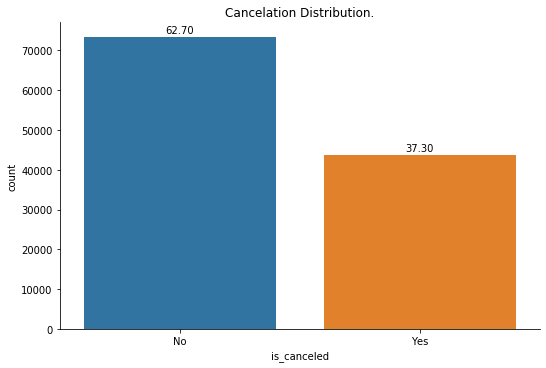

In [40]:
cancellationDist = sns.catplot('is_canceled', data=hotelFeatures, kind='count', aspect=1.5)
plt.title('Cancelation Distribution.')
ax=cancellationDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting Hotel Type Distribution.

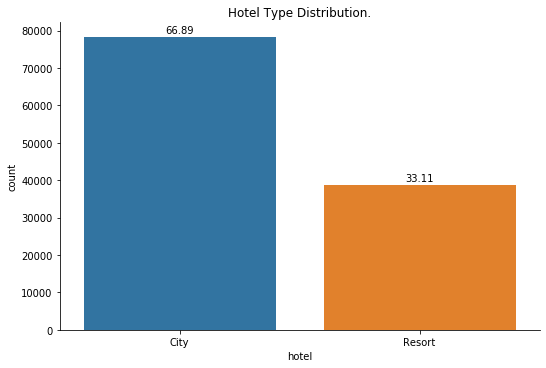

In [41]:
hotelTypeDist = sns.catplot('hotel', data=hotelFeatures, kind='count', aspect=1.5)
plt.title('Hotel Type Distribution.')
ax=hotelTypeDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting people with children distribution.

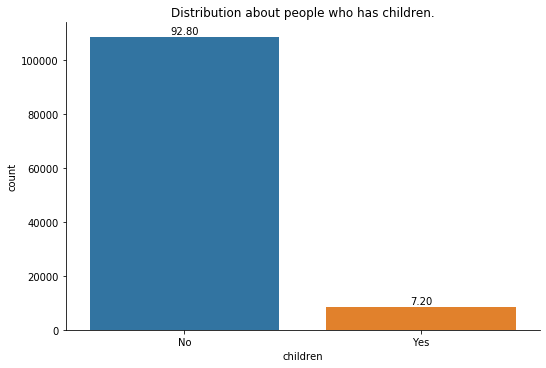

In [42]:
hasChildrenDist = sns.catplot('children', data=hotelFeatures, kind='count', aspect=1.5)
plt.title('Distribution about people who has children.')
ax=hasChildrenDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting Reservation Arrival Year Distribution.

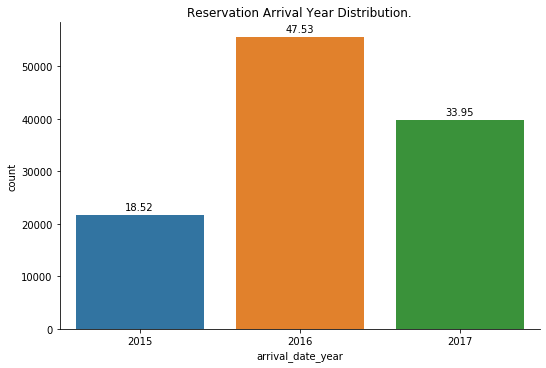

In [43]:
arrivalYearDist = sns.catplot('arrival_date_year', data=hotelFeatures, kind='count', aspect=1.5)
plt.title('Reservation Arrival Year Distribution.')
ax=arrivalYearDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting stays in week nights distribution.

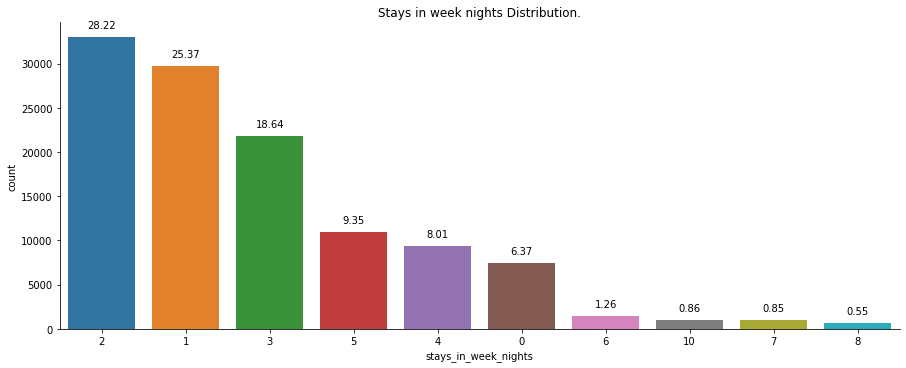

In [44]:
staysWeekDist = sns.catplot('stays_in_week_nights', data=hotelFeatures, kind='count', aspect=2.5, order=hotelFeatures.stays_in_week_nights.value_counts().iloc[:10].index)
plt.title('Stays in week nights Distribution.')
ax=staysWeekDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting stays in weeked nights distribution.

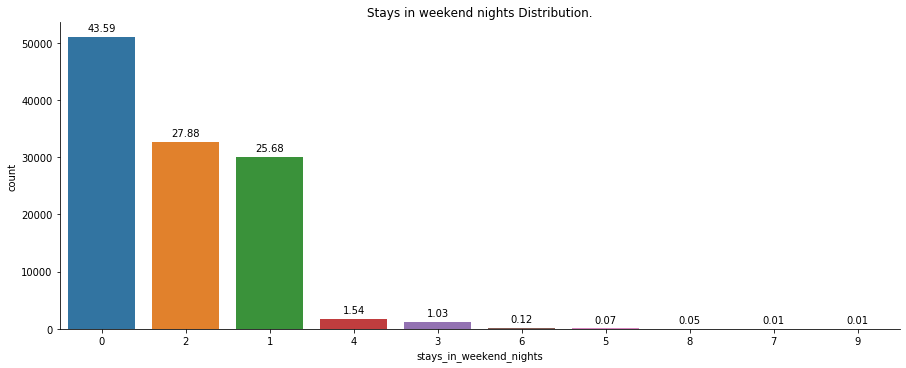

In [45]:
staysWeekendDist = sns.catplot('stays_in_weekend_nights', data=hotelFeatures, kind='count', aspect=2.5, order=hotelFeatures.stays_in_weekend_nights.value_counts().iloc[:10].index)
plt.title('Stays in weekend nights Distribution.')
ax=staysWeekendDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting happiness Score distribution.

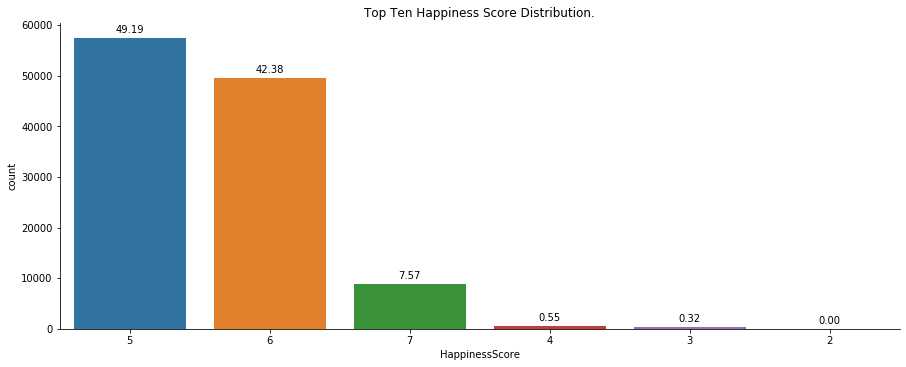

In [46]:
happinessScoreDist = sns.catplot('HappinessScore', data=hotelFeatures, kind='count', aspect=2.5, order=hotelFeatures.HappinessScore.value_counts().iloc[:10].index)
plt.title('Top Ten Happiness Score Distribution.')
ax=happinessScoreDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting customer type distribution.

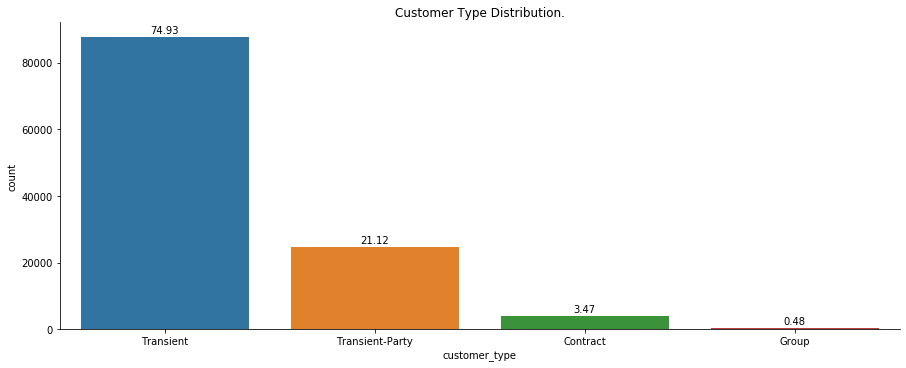

In [47]:
customerTypeDist = sns.catplot('customer_type', data=hotelFeatures, kind='count', aspect=2.5, order=hotelFeatures.customer_type.value_counts().iloc[:4].index)
plt.title('Customer Type Distribution.')
ax=customerTypeDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting repeated guests distribution.

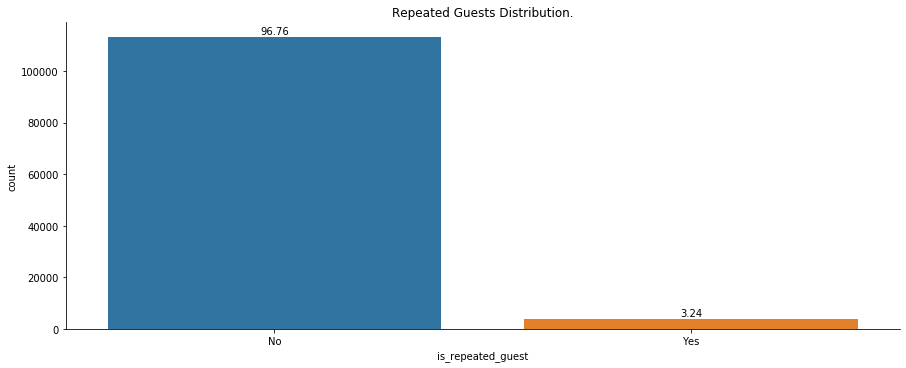

In [48]:
repeatedGuestDist = sns.catplot('is_repeated_guest', data=hotelFeatures, kind='count', aspect=2.5)
plt.title('Repeated Guests Distribution.')
ax=repeatedGuestDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

# Plotting required parking slots distribution.

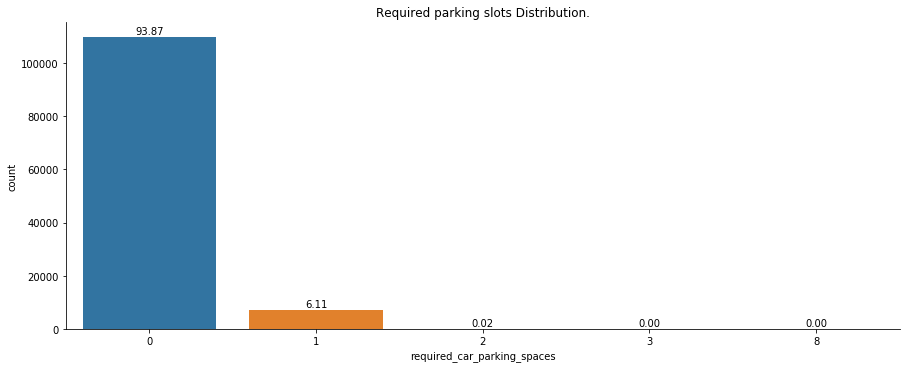

In [49]:
requiredParkingDist = sns.catplot('required_car_parking_spaces', data=hotelFeatures, kind='count', aspect=2.5)
plt.title('Required parking slots Distribution.')
ax=requiredParkingDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting top ten Countries where reservations was made.

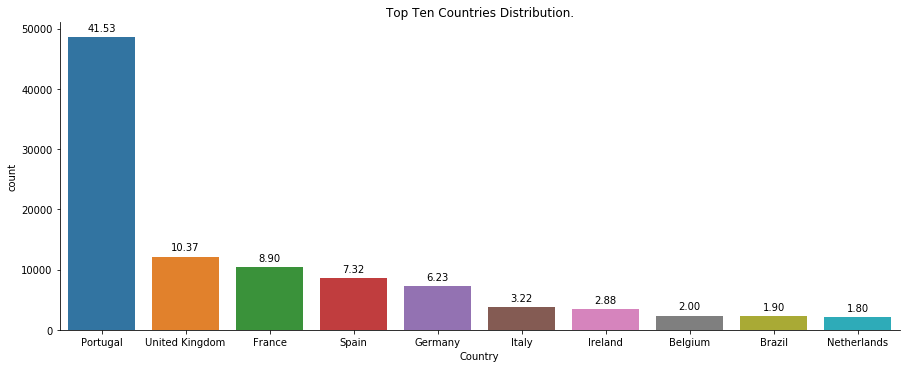

In [50]:
CountriesDist = sns.catplot('Country', data=hotelFeatures, kind='count', aspect=2.5, order=hotelFeatures.Country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries Distribution.')
ax=CountriesDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

##  Plotting meal package distribution selected by customers.

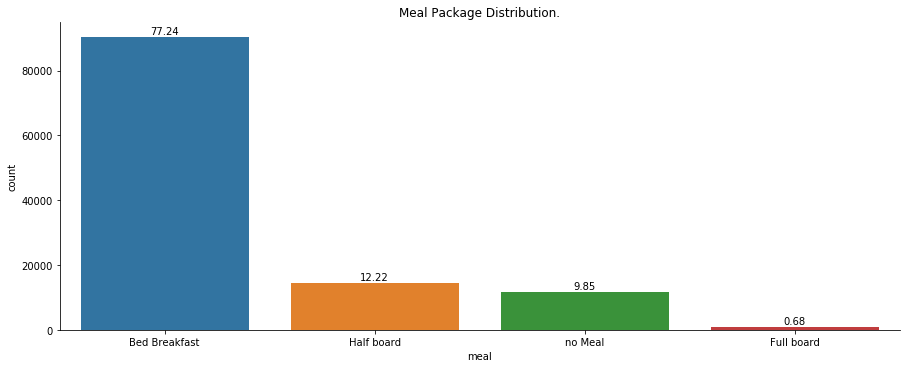

In [51]:
mealTypeDist = sns.catplot('meal', data=hotelFeatures, kind='count', aspect=2.5,  order=hotelFeatures.meal.value_counts().iloc[:5].index)
plt.title('Meal Package Distribution.')
ax=mealTypeDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the number of adults in each reservation.

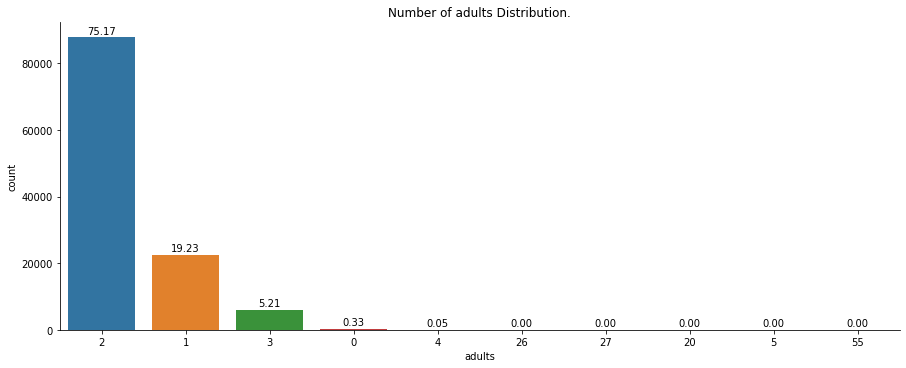

In [52]:
adultsQuantityDist = sns.catplot('adults', data=hotelFeatures, kind='count', aspect=2.5,  order=hotelFeatures.adults.value_counts().iloc[:10 ].index)
plt.title('Number of adults Distribution.')
ax=adultsQuantityDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the total of special request made in each reservation.

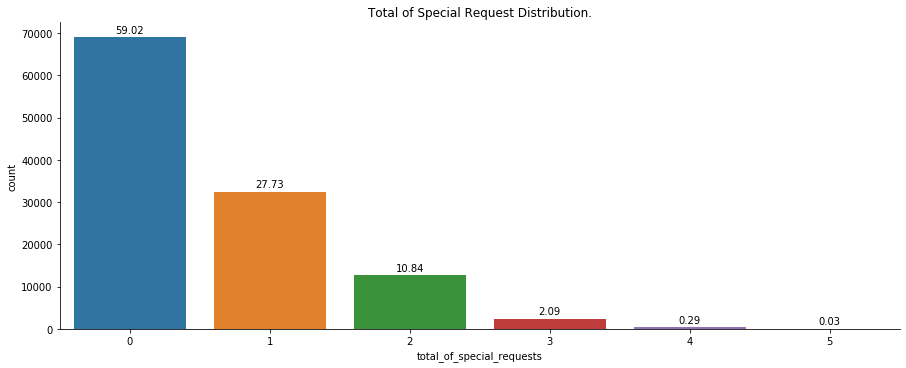

In [53]:
specialRequestsDist = sns.catplot('total_of_special_requests', data=hotelFeatures, kind='count', aspect=2.5)
plt.title('Total of Special Request Distribution.')
ax=specialRequestsDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the number of adults in each reservation vs the total cancelations.


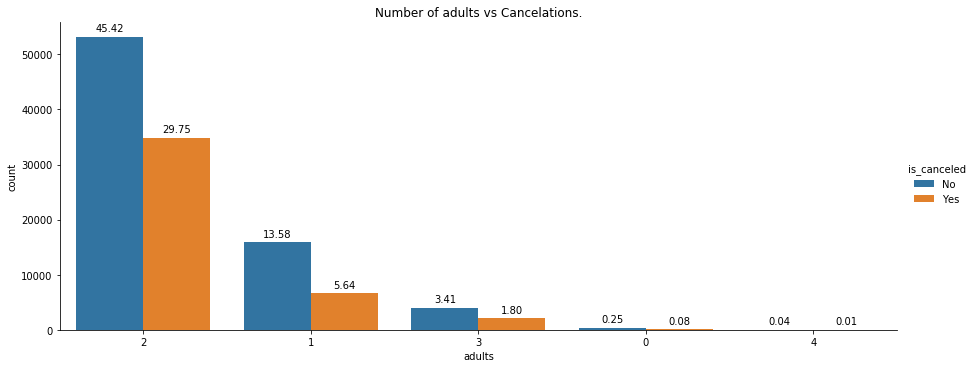

In [54]:
adultsQuantityDist = sns.catplot('adults', data=hotelFeatures, kind='count', aspect=2.5,  hue='is_canceled', order=hotelFeatures.adults.value_counts().iloc[:5].index)
plt.title('Number of adults vs Cancelations.')
ax=adultsQuantityDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the happiness score of the country where the reservation was made vs the total cancellations.


posx and posy should be finite values
posx and posy should be finite values


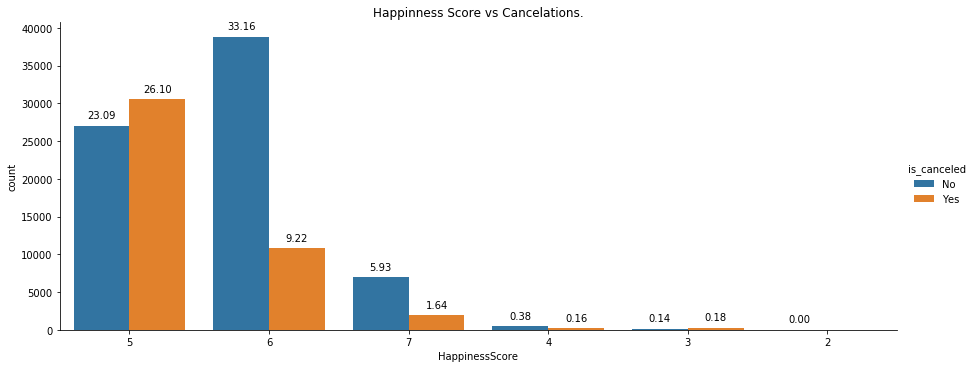

In [55]:
adultsQuantityDist = sns.catplot('HappinessScore', data=hotelFeatures, kind='count', aspect=2.5,  hue='is_canceled', order=hotelFeatures.HappinessScore.value_counts().iloc[:10].index)
plt.title('Happinness Score vs Cancelations.')
ax=adultsQuantityDist.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the happiness rank of the country where the reservation was made vs the total cancellations.


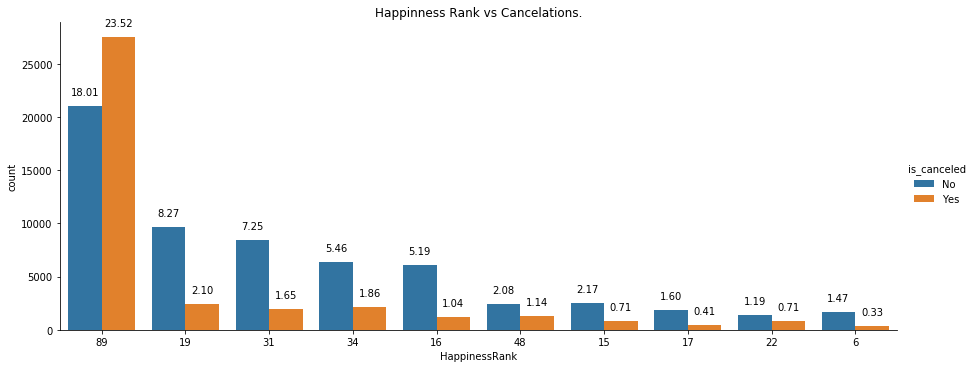

In [56]:
happinessRankCancelation = sns.catplot('HappinessRank', data=hotelFeatures, kind='count', aspect=2.5,  hue='is_canceled', order=hotelFeatures.HappinessRank.value_counts().iloc[:10].index)
plt.title('Happinness Rank vs Cancelations.')
ax=happinessRankCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1000,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the arrival date year of the reservation vs the cancellations.

13573
35517
24266
8093
20091
15457


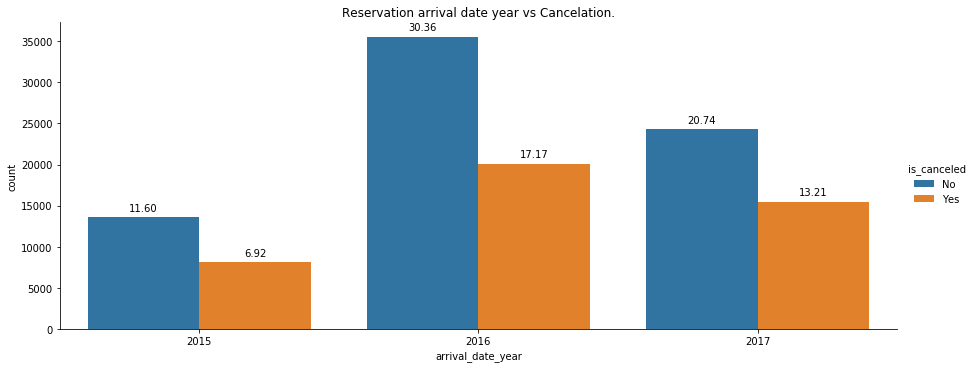

In [57]:
arrivalCancelation = sns.catplot('arrival_date_year', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=["2015","2016","2017"])
plt.title('Reservation arrival date year vs Cancelation.')
ax=arrivalCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the hotel type where the reservation was made vs the cancellations.


45553
27803
32703
10938


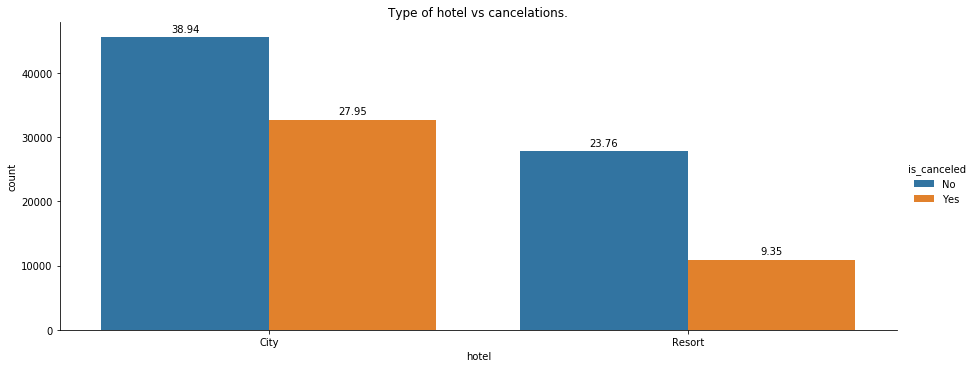

In [58]:
hotelCancelation = sns.catplot('hotel', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=["City","Resort"])
plt.title('Type of hotel vs cancelations.')
ax=hotelCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

# Plotting the meal package selected in the reservation vs the cancellations.

56305
9337
7398
316
34069
4962
4132
478


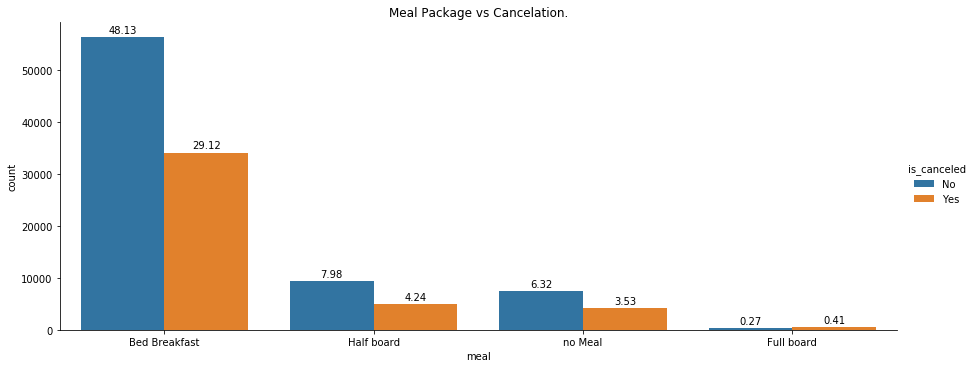

In [59]:
mealCancelation = sns.catplot('meal', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=hotelFeatures.meal.value_counts().iloc[:5].index)
plt.title('Meal Package vs Cancelation.')
ax=mealCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

# Plotting the repeated guests vs the cancellations.

70114
3242
43089
552


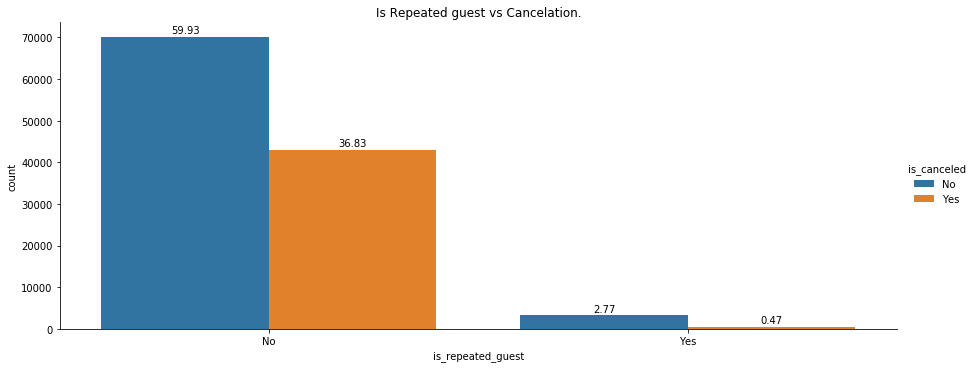

In [60]:
repeatedCancelation = sns.catplot('is_repeated_guest', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=["No","Yes"])
plt.title('Is Repeated guest vs Cancelation.')
ax=repeatedCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting if there were childrens in the reservation vs the cancellations.

68002
5354
40574
3067


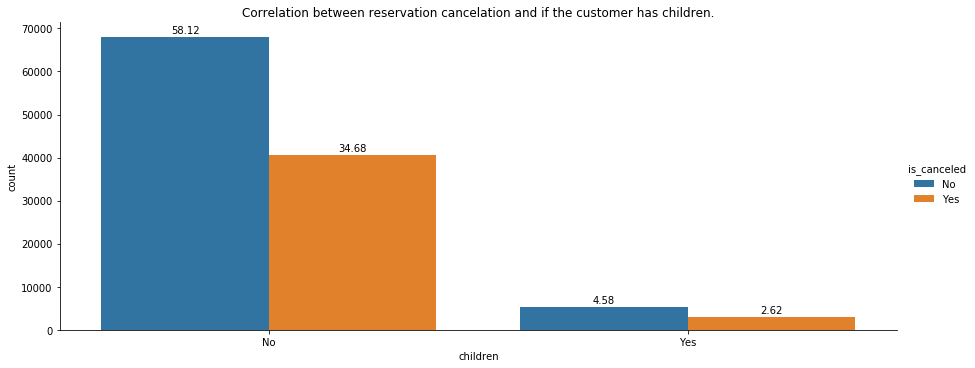

In [61]:
childrenCancelation = sns.catplot('children', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=["No","Yes"])
plt.title('Correlation between reservation cancelation and if the customer has children.')
ax=childrenCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the total of special requests made on the reservation vs the cancellations.

35843
25290
9874
2012
300
37
33211
7152
2806
436
35
1


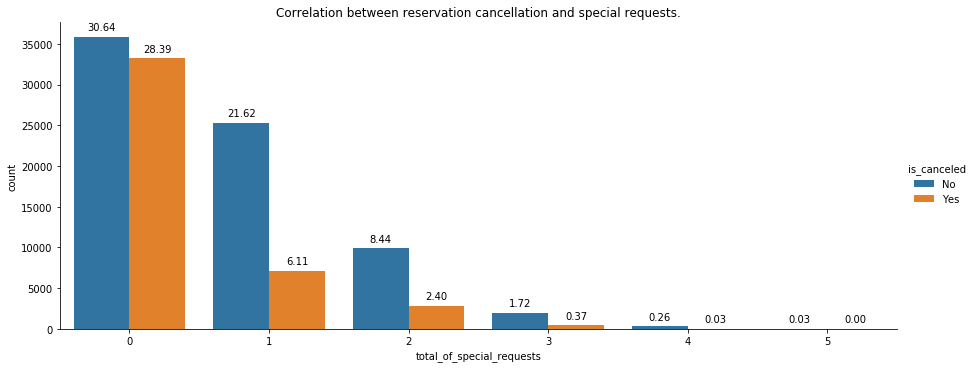

In [62]:
hotel_is_cancelled = sns.catplot('total_of_special_requests', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5)
plt.title('Correlation between reservation cancellation and special requests.')
ax=hotel_is_cancelled.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the customer type vs the cancellations.

51715
18345
2795
501
35954
6367
1262
58


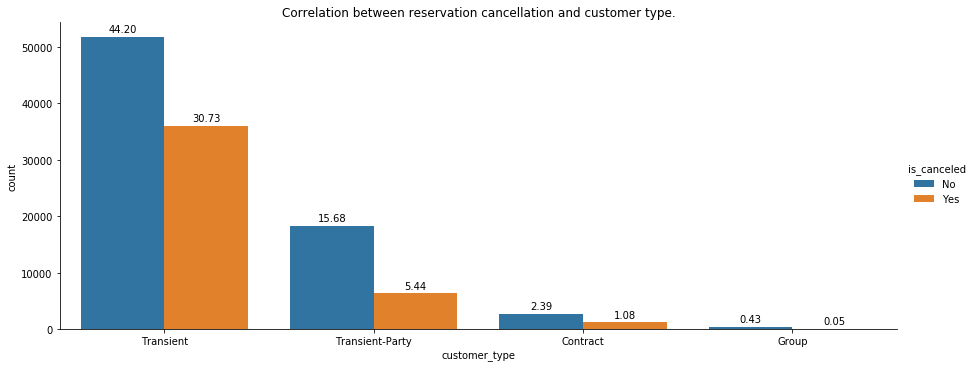

In [63]:
customerCancelation = sns.catplot('customer_type', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=hotelFeatures.customer_type.value_counts().iloc[:5].index)
plt.title('Correlation between reservation cancellation and customer type.')
ax=customerCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the amount of parking spaces requested in the resercation vs the cancellations.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


66179.0
7144.0
28.0
3.0
2.0
43641.0
nan
nan
nan
nan


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


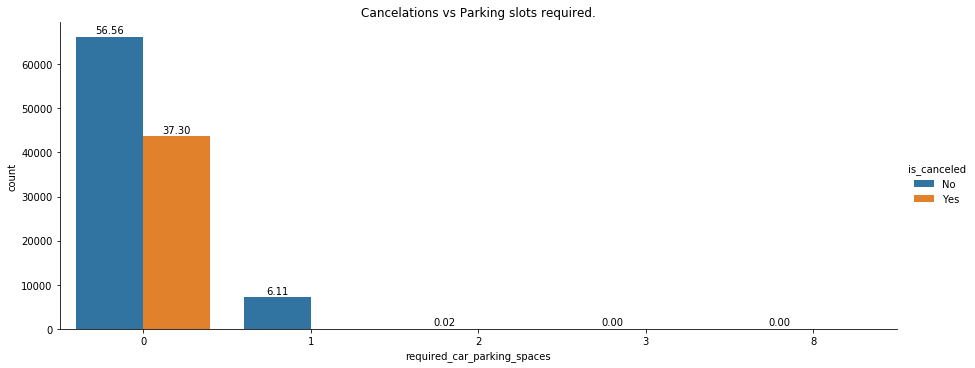

In [64]:
specialCancelation = sns.catplot('required_car_parking_spaces', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5)
plt.title('Cancelations vs Parking slots required.')
ax=specialCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the amount of adults in the reservation vs the cancellations.

53142
15889
3987
293
45
34806
6604
2103
96
16


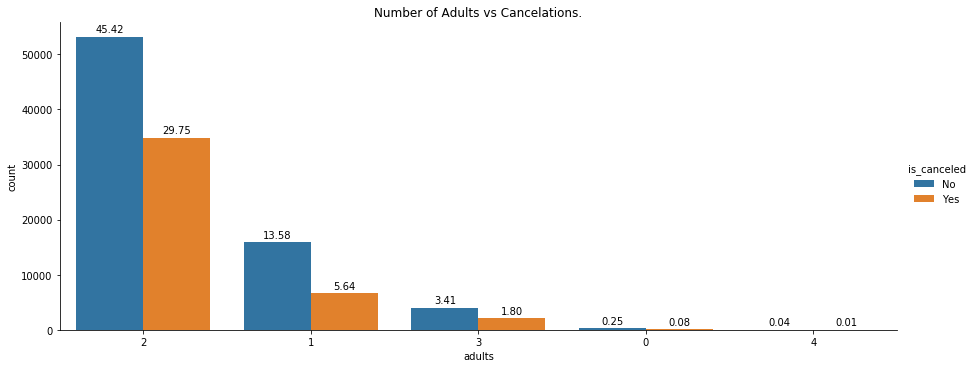

In [65]:
adultsCancelation= sns.catplot('adults', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=hotelFeatures.adults.value_counts().iloc[:5].index)
plt.title('Number of Adults vs Cancelations.')
ax=adultsCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the lead time to the resrvation vs the cancellations.

5731
3021
1794
1608
1513
1316
1203
1126
891
795
414
317
206
177
171
205
200
165
220
271


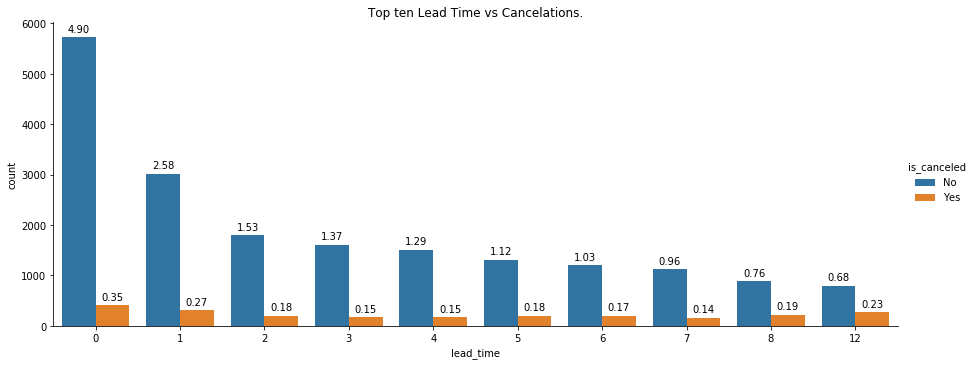

In [66]:
leadCancelation= sns.catplot('lead_time', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=hotelFeatures.lead_time.value_counts().iloc[:10].index)
plt.title('Top ten Lead Time vs Cancelations.')
ax=leadCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting the average Daily Rate of the hotel vs the cancellations.

919
1543
1701
1548
1876
1564
1278
901
1729
765
758
730
1115
863
884
3610
1702
1263
1300
820
763
840
1142
204
1114
1081
1093
707
600
499


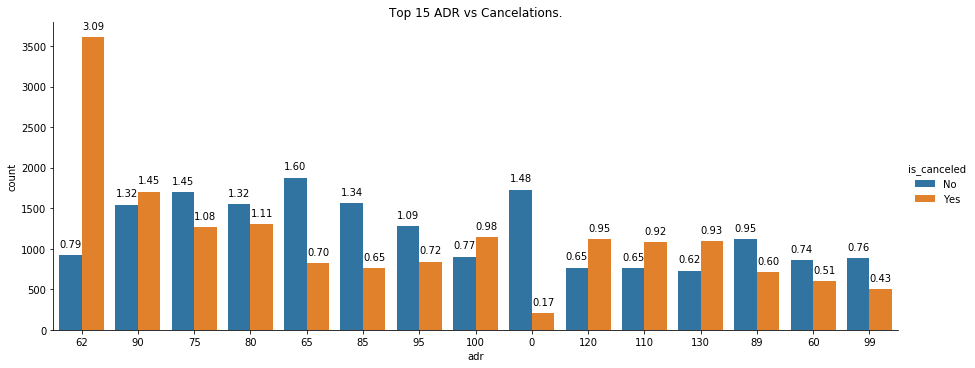

In [67]:
adrCancelation= sns.catplot('adr', data=hotelFeatures, kind='count', hue='is_canceled', aspect=2.5, order=hotelFeatures.adr.value_counts().iloc[:15].index)
plt.title('Top 15 ADR vs Cancelations.')
ax=adrCancelation.ax #annotate axis = seaborn axis
  
for p in ax.patches:
    height = p.get_height()
    print(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}'.format(height/total_reservations*100),
            ha="center")
plt.show()

## Plotting happiness rank vs the cancellations.

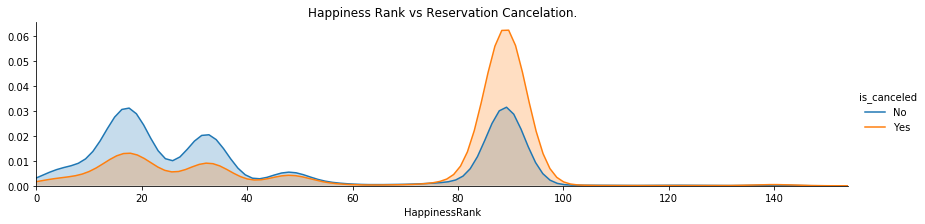

In [68]:
cancelationvsHapiness = sns.FacetGrid(hotelFeatures, hue='is_canceled', aspect=4)
cancelationvsHapiness.map(sns.kdeplot, 'HappinessRank', shade=True)
maxi = hotelFeatures['HappinessRank'].max()
cancelationvsHapiness.set(xlim=(0,maxi))
cancelationvsHapiness.set(title='Happiness Rank vs Reservation Cancelation.')
cancelationvsHapiness.add_legend()

## Plotting happiness score vs the cancellations.

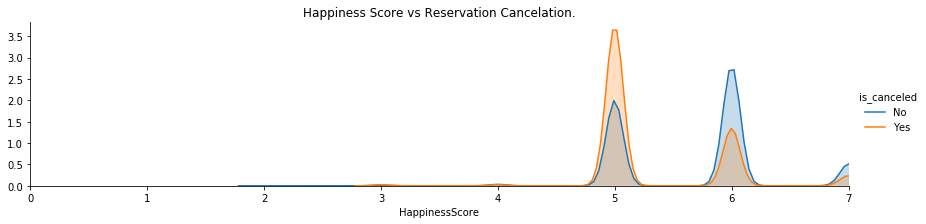

In [69]:
cancelationvsHapiness = sns.FacetGrid(hotelFeatures, hue='is_canceled', aspect=4)
cancelationvsHapiness.map(sns.kdeplot, 'HappinessScore', shade=True)
maxi = hotelFeatures['HappinessScore'].max()
cancelationvsHapiness.set(xlim=(0,maxi))
cancelationvsHapiness.set(title='Happiness Score vs Reservation Cancelation.')
cancelationvsHapiness.add_legend()

## Plotting lead time for the reservation vs the cancellations.

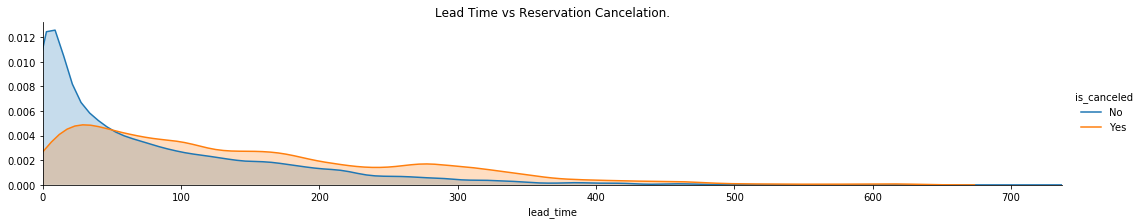

In [70]:
cancelationvsHapiness = sns.FacetGrid(hotelFeatures, hue='is_canceled', aspect=5)
cancelationvsHapiness.map(sns.kdeplot, 'lead_time', shade=True)
maxi = hotelFeatures['lead_time'].max()
cancelationvsHapiness.set(xlim=(0,maxi))
cancelationvsHapiness.set(title='Lead Time vs Reservation Cancelation.')
cancelationvsHapiness.add_legend()

## Plotting the meal package vs the cancellations for each arrival date year.

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


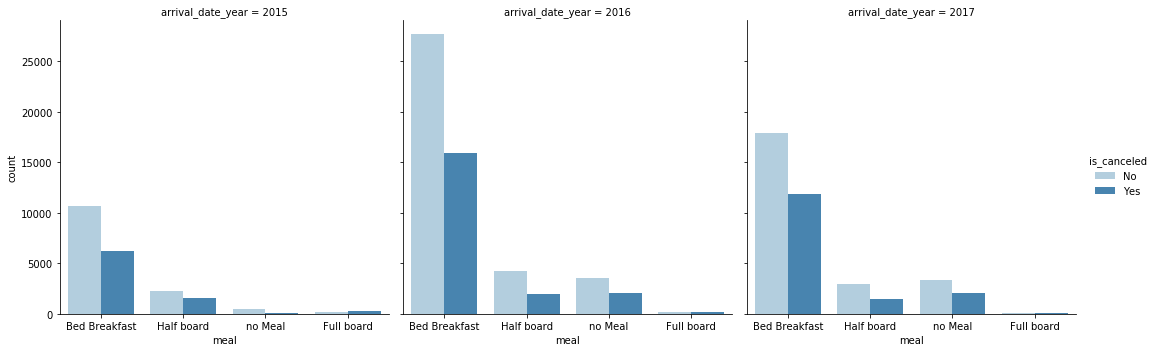

In [71]:
fg=sns.factorplot('meal', data=hotelFeatures, kind='count', hue='is_canceled', col='arrival_date_year',
                 palette='Blues', order=hotelFeatures.meal.value_counts().iloc[:5].index)



## Plotting the meal package vs the cancellations for customes who has/has not childrens.

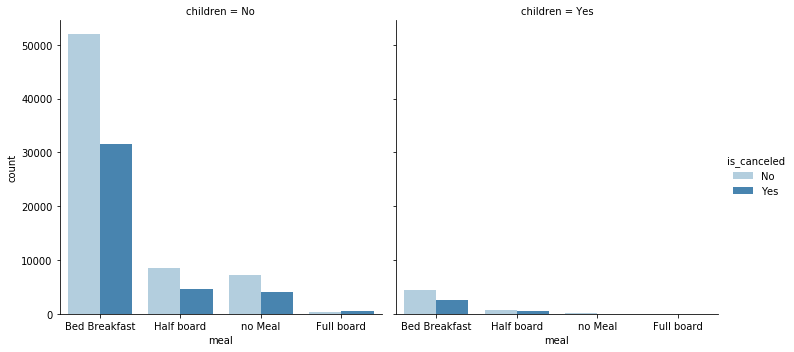

In [72]:
fg=sns.factorplot('meal', data=hotelFeatures, kind='count', hue='is_canceled', col='children',
                 palette='Blues', order=hotelFeatures.meal.value_counts().iloc[:5].index)


## Plotting thetype of hotel vs the cancellations for customers who has / has not childrens.

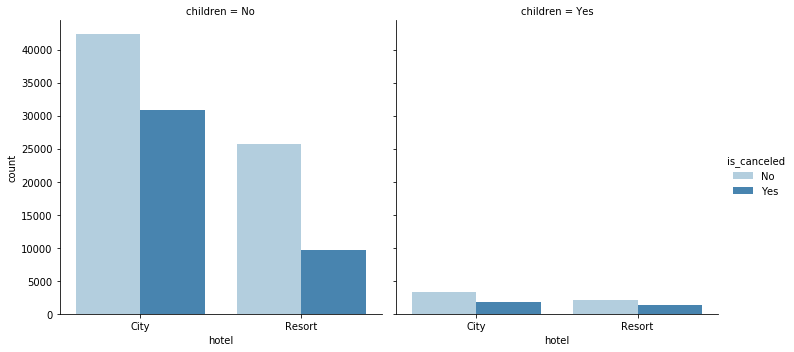

In [73]:
fg=sns.factorplot('hotel', data=hotelFeatures, kind='count', hue='is_canceled', col='children',
                 palette='Blues',order=["City","Resort"])

# Plotting the customer tyoe vs the cancellations for repeated / not repeated guests.

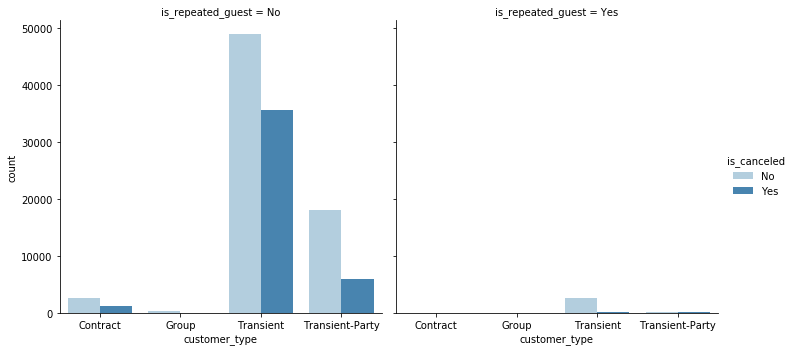

In [74]:
fg=sns.factorplot('customer_type', data=hotelFeatures, kind='count', hue='is_canceled', col='is_repeated_guest',
                 palette='Blues')

# Plotting the customer tyoe vs the cancellations for customers who has / has not childrens.

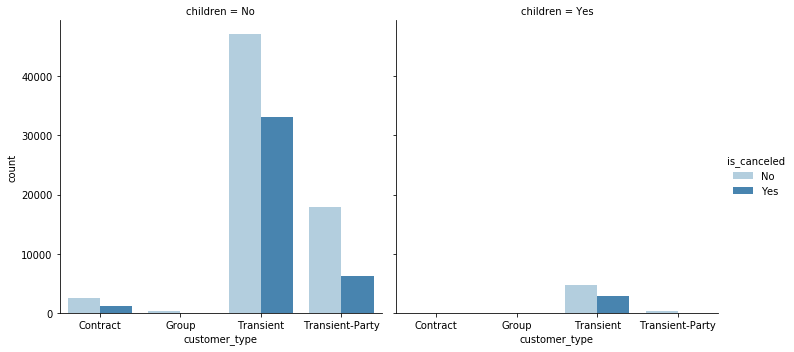

In [75]:
fg=sns.factorplot('customer_type', data=hotelFeatures, kind='count', hue='is_canceled', col='children',
                 palette='Blues')

 # Creating Models for Predictions.

In [76]:
hotelFeatures.head()

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,is_repeated_guest,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Country,HappinessRank,HappinessScore
0,Resort,No,342,2015,0,0,2,No,Bed Breakfast,Direct,No,3,0,Transient,0,0,0,Portugal,89,5
1,Resort,No,737,2015,0,0,2,No,Bed Breakfast,Direct,No,4,0,Transient,0,0,0,Portugal,89,5
2,Resort,No,7,2015,0,1,1,No,Bed Breakfast,Direct,No,0,0,Transient,75,0,0,United Kingdom,19,6
3,Resort,No,13,2015,0,1,1,No,Bed Breakfast,Corporate,No,0,0,Transient,75,0,0,United Kingdom,19,6
4,Resort,No,14,2015,0,2,2,No,Bed Breakfast,Travel Tour Agents,No,0,0,Transient,98,0,1,United Kingdom,19,6


In [77]:
hotelFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116997 entries, 0 to 119389
Data columns (total 20 columns):
hotel                          116997 non-null category
is_canceled                    116997 non-null category
lead_time                      116997 non-null int64
arrival_date_year              116997 non-null category
stays_in_weekend_nights        116997 non-null int64
stays_in_week_nights           116997 non-null int64
adults                         116997 non-null int64
children                       116997 non-null category
meal                           116997 non-null category
distribution_channel           116997 non-null category
is_repeated_guest              116997 non-null category
booking_changes                116997 non-null int64
days_in_waiting_list           116997 non-null int64
customer_type                  116997 non-null category
adr                            116997 non-null int64
required_car_parking_spaces    116997 non-null int64
total_of_special_

In [78]:
hotelFeatures.dtypes

hotel                          category
is_canceled                    category
lead_time                         int64
arrival_date_year              category
stays_in_weekend_nights           int64
stays_in_week_nights              int64
adults                            int64
children                       category
meal                           category
distribution_channel           category
is_repeated_guest              category
booking_changes                   int64
days_in_waiting_list              int64
customer_type                  category
adr                               int64
required_car_parking_spaces       int64
total_of_special_requests         int64
Country                        category
HappinessRank                     int64
HappinessScore                    int64
dtype: object

## Initializing Models.
### We are going to test tree diferents Machine Learning Models, Random Forest, K-Nearest Neighbor and Decision Trees.

In [136]:
#Models

modelRF = RandomForestClassifier()
modelKN = KNeighborsClassifier()
modelDT = DecisionTreeClassifier()


#Reduced Feature Elimination Vars

modelRF_RFE = RandomForestClassifier()
modelKNC_RFE = KNeighborsClassifier()
modelDT_RFE = DecisionTreeClassifier()

#Principal Component Analysis Vars

modelRF_PCA = RandomForestClassifier()
modelKNC_PCA = KNeighborsClassifier()
modelDT_PCA = DecisionTreeClassifier()


#Correlation Matrix Analysis Vars

modelRF_CORR = RandomForestClassifier()
modelKNC_CORR = KNeighborsClassifier()
modelDT_CORR = DecisionTreeClassifier()


## Removing dependant variable "is_cancelled" from the new Features Dataset

In [137]:
features=hotelFeatures.drop(['is_canceled'], axis=1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,hotel,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,is_repeated_guest,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Country,HappinessRank,HappinessScore
0,Resort,342,2015,0,0,2,No,Bed Breakfast,Direct,No,3,0,Transient,0,0,0,Portugal,89,5
1,Resort,737,2015,0,0,2,No,Bed Breakfast,Direct,No,4,0,Transient,0,0,0,Portugal,89,5
2,Resort,7,2015,0,1,1,No,Bed Breakfast,Direct,No,0,0,Transient,75,0,0,United Kingdom,19,6
3,Resort,13,2015,0,1,1,No,Bed Breakfast,Corporate,No,0,0,Transient,75,0,0,United Kingdom,19,6
4,Resort,14,2015,0,2,2,No,Bed Breakfast,Travel Tour Agents,No,0,0,Transient,98,0,1,United Kingdom,19,6


In [138]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116997 entries, 0 to 119389
Data columns (total 19 columns):
hotel                          116997 non-null category
lead_time                      116997 non-null int64
arrival_date_year              116997 non-null category
stays_in_weekend_nights        116997 non-null int64
stays_in_week_nights           116997 non-null int64
adults                         116997 non-null int64
children                       116997 non-null category
meal                           116997 non-null category
distribution_channel           116997 non-null category
is_repeated_guest              116997 non-null category
booking_changes                116997 non-null int64
days_in_waiting_list           116997 non-null int64
customer_type                  116997 non-null category
adr                            116997 non-null int64
required_car_parking_spaces    116997 non-null int64
total_of_special_requests      116997 non-null int64
Country             

## Select the Dependent Variable "is_canceled"

In [139]:
depVar = hotelFeatures['is_canceled']
print(depVar)

0         No
1         No
2         No
3         No
4         No
          ..
119385    No
119386    No
119387    No
119388    No
119389    No
Name: is_canceled, Length: 116997, dtype: category
Categories (2, object): [No, Yes]


# Applying Feature Selection Methods.

## Applying Correlation Matrix Reduction.

### From Correlation Matrix, we will drop all the features except for lead_time, adults days in waiting list, happiness rank and country.


In [140]:
featuresCORR = features.drop(['arrival_date_year','stays_in_weekend_nights','stays_in_week_nights','children', 'meal', 'distribution_channel', 'booking_changes', 'customer_type', 'required_car_parking_spaces', 'HappinessScore', 'total_of_special_requests'], axis=1)

## Applying Recursive Feature Elimination.

In [92]:
# Making a dataset copy to apply RFE
featuresRFE=features.copy()
featuresRFE = pd.get_dummies(featuresRFE)
dtC= DecisionTreeClassifier(random_state=101)
rfeCV=RFECV(estimator=dtC, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfeCV.fit(featuresRFE, depVar)
print('The number of optimal feaures found is: {}'.format(rfecv.n_features_))

KeyboardInterrupt: 

## Partitioning and creating dataset using 75% for training and 25% for testing.

In [155]:
xTrain, xTest, yTrain, yTest = train_test_split(features, depVar)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((87747, 19), (29250, 19), (87747,), (29250,))

In [156]:
xTrainRFE, xTestRFE, yTrainRFE, yTestRFE = train_test_split(featuresRFE, depVar)
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((87747, 209), (29250, 209), (87747,), (29250,))

In [208]:
xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = train_test_split(features, depVar)
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((87747, 19), (29250, 19), (87747,), (29250,))

In [158]:
xTrainCORR, xTestCORR, yTrainCORR, yTestCORR = train_test_split(featuresCORR, depVar)
xTrainCORR.shape, xTestCORR.shape, yTrainCORR.shape, yTestCORR.shape

((87747, 8), (29250, 8), (87747,), (29250,))

## Principal Component Analysis

In [159]:
standScaler= StandardScaler()
xTrainPCA = pd.get_dummies(xTrainPCA)
xTestPCA = pd.get_dummies(xTestPCA)
xTrainPCA=standScaler.fit_transform(xTrainPCA)
xTestPCA=standScaler.fit_transform(xTestPCA)
pca=PCA(n_components=8) # 8 columns that represents ~75% variability
xTrainPCA=pca.fit_transform(xTrainPCA)
xTestPCA=pca.fit_transform(xTestPCA)
explained_variance=pca.explained_variance_ratio_
sum(explained_variance)

0.14092009905264613

In [160]:
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((87747, 8), (29250, 8), (87747,), (29250,))

In [161]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116997 entries, 0 to 119389
Data columns (total 19 columns):
hotel                          116997 non-null category
lead_time                      116997 non-null int64
arrival_date_year              116997 non-null category
stays_in_weekend_nights        116997 non-null int64
stays_in_week_nights           116997 non-null int64
adults                         116997 non-null int64
children                       116997 non-null category
meal                           116997 non-null category
distribution_channel           116997 non-null category
is_repeated_guest              116997 non-null category
booking_changes                116997 non-null int64
days_in_waiting_list           116997 non-null int64
customer_type                  116997 non-null category
adr                            116997 non-null int64
required_car_parking_spaces    116997 non-null int64
total_of_special_requests      116997 non-null int64
Country             

# Models

## Random Forest Classification Model Fitting and Scoring

### Original Data Set


In [162]:
xTrain = pd.get_dummies(xTrain)
xTest = pd.get_dummies(xTest)



modelRF.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
print(cross_val_score(modelRF, xTrain, yTrain)) 
modelRF.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.83052412 0.83124209 0.82905398]


0.9808654426931975

### Principal Component Analysis Data Set

In [217]:
modelRF_PCA.fit(xTrainPCA,yTrainPCA)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [218]:
print(cross_val_score(modelRF_PCA, xTrainPCA, yTrainPCA)) 
modelRF_PCA.score(xTrainPCA,yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.85357265 0.85418305 0.85325492]


0.9836917501453041

### Correlation Matrix Dataset

In [170]:
xTrainCORR = pd.get_dummies(xTrainCORR)
xTestCORR = pd.get_dummies(xTestCORR)
modelRF_CORR.fit(xTrainCORR,yTrainCORR)


C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
print(cross_val_score(modelRF_CORR, xTrainCORR, yTrainCORR)) 
modelRF_CORR.score(xTrainCORR,yTrainCORR)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80006154 0.80501898 0.79500154]


0.960591245284739

### Recursive Feature Selection Data set

In [ ]:
modelRF_RFE.fit(xTrainRFE,yTrainRFE)

In [ ]:
print(cross_val_score(modelRF_RFE, xTrainRFE, yTrainRFE)) 
modelRF_RFE.score(xTrainRFE,yTrainRFE)

### Random Forest - Tuning two parameters using the best Random Forest - Original Set without Feature Selection

### Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80

In [172]:
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.85801224 0.86283292 0.85756778]


0.9940510786693563

# THE BEST RANDOM MODEL IS: modelRF_Tuned_trees -> This model will be one of the best choices for making the predictions.






## Decision Tree Regression Model Fitting and Scoring

### Original Data Set



In [195]:
modelDT.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [196]:
print(cross_val_score(modelDT, xTrain, yTrain)) 
modelDT.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81544668 0.82207939 0.82019898]


0.9923302221158559

### Principal Component Analysis Data Set


In [115]:
modelDT_PCA.fit(xTrainPCA,yTrainPCA)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
print(cross_val_score(modelDT_PCA, xTrainPCA,yTrainPCA)) 
modelDT_PCA.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79610256 0.79065951 0.7890796 ]


0.993823150649025

### Correlation Matrix Dataset

In [117]:
modelDT_CORR.fit(xTrainCORR,yTrainCORR)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
print(cross_val_score(modelDT_CORR, xTrainCORR, yTrainCORR)) 
modelDT_CORR.score(xTrainCORR,yTrainCORR)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77965059 0.78043694 0.7831037 ]


0.9741643588954608

### Recursive Feature Selection Data set

In [ ]:
modelDT_RFE.fit(xTrainRFE,yTrainRFE)

In [ ]:
print(cross_val_score(modelDT_RFE, xTrainRFE,yTrainRFE)) 
modelDT_RFE.score(xTrainRFE, yTrainRFE)

### Decision Tree - Tuning two parameters using the best Decision Tree - Original Set without Feature Selection.

### Tuning splitter from "best" to "random" and mon_samples_split parameter from 2 to 5

In [185]:
modelDT_Tuned_splitter=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')
modelDT_Tuned_splitter.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [186]:
print(cross_val_score(modelDT_Tuned_splitter, xTrain, yTrain)) 
modelDT_Tuned_splitter.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80296762 0.80577114 0.79811276]


0.9306984854183049

# THE BEST DECISION MODEL IS: modelDT -> This model will be one of the best choices for making the predictions.


## K-Nearest Neighbor Regression Model Fitting and Scoring


### Original Data Set




In [120]:
modelKN.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [121]:
print(cross_val_score(modelKN, xTrain, yTrain)) 
modelKN.score(xTrain,yTrain)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7834188  0.78665937 0.78528446]


0.8559494911506946

### Principal Component Analysis Data Set


In [122]:
modelKNC_PCA.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [123]:
print(cross_val_score(modelKNC_PCA, xTrainPCA,yTrainPCA)) 
modelKNC_PCA.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8154188  0.81407911 0.81338895]


0.8769416618231962

### Correlation Matrix Dataset


In [124]:
modelKNC_CORR.fit(xTrainCORR,yTrainCORR)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
print(cross_val_score(modelKNC_CORR, xTrainCORR,yTrainCORR)) 
modelKNC_CORR.score(xTrainCORR,yTrainCORR)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77889842 0.78053951 0.78416356]


0.8487355693072128

### Recursive Feature Selection Data set


In [ ]:
modelKNC_RFE.fit(xTrainRFE,yTrainRFE)

In [ ]:
print(cross_val_score(modelKNC_RFE, xTrainRFE, yTrainRFE)) 
modelKNC_RFE.score(xTrainRFE, yTrainRFE)

### KNN Model - Tuning two parameters using the best KNN - PCA Set

### Tuning neighbors from 5 to 2 and p parameter from 2 to 10


In [201]:
modelKNC_Tuned_n=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [202]:
modelKNC_Tuned_n.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [203]:
print(cross_val_score(modelKNC_Tuned_n, xTrainPCA,yTrainPCA)) 
modelKNC_Tuned_n.score(xTrainPCA, yTrainPCA)

C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81773736 0.81883141 0.81995966]


0.9120197841521648

# THE BEST KNN MODEL IS: modelKNC_Tuned_n  -> This model will be one of the best choices for making the predictions.


# Making Predictions.

## Predicting with best Random Forest Model

In [193]:
#Make Predictions with Random Forest.
predictionsRF= modelRF_Tuned_trees.predict(xTest)
predRsquared = r2_score(yTest,predictionsRF)
rmse = sqrt(mean_squared_error(yTest, predictionsRF))
accuracy=accuracy_score(predictionsRF, yTest)
confusionMatrix=confusion_matrix(predictionsRF.argmax(axis=1),yTest.values.argmax(axis=1))
clasificationReport=classification_report(predictionsRF,yTest)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

R Squared: 0.448
RMSE: 0.360
Accuracy: 0.868
Confusion Matrix: [[16887  2443]
 [ 1353  8567]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.92      0.88      0.90     19208
           1       0.78      0.86      0.82      9920

   micro avg       0.87      0.87      0.87     29128
   macro avg       0.85      0.87      0.86     29128
weighted avg       0.87      0.87      0.87     29128
 samples avg       0.87      0.87      0.87     29128



C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Predicting with best Decision Tree Model


In [197]:
#Make Predictions with Decision Tree Model.
predictionsDT = modelDT.predict(xTest)
predRsquared = r2_score(yTest,predictionsDT)
rmse = sqrt(mean_squared_error(yTest, predictionsDT))
accuracy=accuracy_score(predictionsDT, yTest)
confusionMatrix=confusion_matrix(predictionsDT.argmax(axis=1),yTest.values.argmax(axis=1))
clasificationReport=classification_report(predictionsDT,yTest)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('Accuracy: %.3f' % accuracy)
print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

R Squared: 0.281
RMSE: 0.411
Accuracy: 0.830
Confusion Matrix: [[15763  2450]
 [ 2477  8560]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.86      0.87      0.86     18121
           1       0.78      0.78      0.78     11037

   micro avg       0.83      0.83      0.83     29158
   macro avg       0.82      0.82      0.82     29158
weighted avg       0.83      0.83      0.83     29158
 samples avg       0.83      0.83      0.83     29158



C:\Users\gfrances\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


# We are going to choose the Random Forest Model since showed the best accuracy in the predictions ~ 86% and 0.448 R Squared.

# Plotting the Results